# Orbit Error

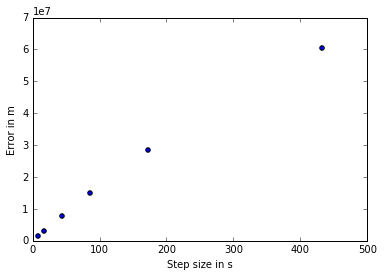

In [3]:
# Determine the step size h so that after 
# num_points the time total_times has passed.
# Compute the trajectory of the spacecraft 
# starting from a point a distance r from 
# the origin with a velocity of magnitude 
# equal to the speed. Use the Forward Euler 
# Method. Return the distance between the final 
# and the initial position in the variable 
# error.
import numpy
import math
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# These are used to keep track of the data we want to plot
h_array = []
error_array = []

total_time = 24. * 3600. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time**2. / 4. / math.pi ** 2.) ** (1. / 3.)
speed = 2.0 * math.pi * radius / total_time

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def calculate_error(num_step):
    h = total_time / num_steps
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    
    x[0, 0] = radius
    v[0, 1] = speed
    
    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * acceleration(x[step])
    
    
    error = numpy.linalg.norm(x[-1] - x[0])
    plt.scatter(h, error)
    
    return error

for num_steps in [200, 500, 1000, 2000, 5000, 10000]:    
    error = calculate_error(num_steps)
    



def plot_me():
    axes = plt.gca()
    axes.set_xlabel('Step size in s')
    axes.set_ylabel('Error in m')
    plt.scatter(h_array, error_array)
    plt.xlim(xmin = 0.)
    plt.ylim(ymin = 0.)

plot_me()
    


# Programming Heuns

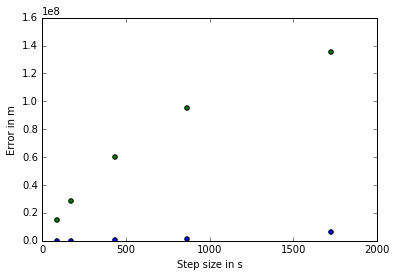

In [4]:
# Implement Heun's Method in the function below, 
# building off of the Forward Euler method as a 
# base. The resulting diagram will show the 
# errors in comparison.

total_time = 24. * 3600. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time**2. / 4. / math.pi ** 2.) ** (1. / 3.)
speed = 2.0 * math.pi * radius / total_time

# These are used to keep track of the data we want to plot
h_array = []
euler_error_array = []
heuns_error_array = []

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def heuns_method(num_steps):
    ###Original Euler Method
    h = total_time / num_steps

    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = radius
    v[0, 1] = speed

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * acceleration(x[step])

    error = numpy.linalg.norm(x[-1] - x[0])
    h_array.append(h)
    euler_error_array.append(error)
    ###End Original Euler Method

    ###Heun's Method
    for step in range(num_steps):
        initial_acceleration = acceleration(x[step])
        xE = x[step] + h * v[step]
        vE = v[step] + h * initial_acceleration
        x[step + 1] = x[step] + h * 0.5*(v[step] + vE)
        v[step + 1] = v[step] + h*0.5*(initial_acceleration + acceleration(xE))

    error = numpy.linalg.norm(x[-1] - x[0])
    heuns_error_array.append(error)

    ###End Heun's Method

    return x, v, error

for num_steps in [50, 100, 200, 500, 1000]:
    x, v, error = heuns_method(num_steps) #Check x, v, error



def plot_me():
    matplotlib.pyplot.scatter(h_array, euler_error_array, c = 'g')
    matplotlib.pyplot.scatter(h_array, heuns_error_array, c = 'b')
    matplotlib.pyplot.xlim(xmin = 0.)
    matplotlib.pyplot.ylim(ymin = 0.)
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Step size in s')
    axes.set_ylabel('Error in m')
    
plot_me()

## Adaptive Step Size


total_time = 12500. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth


def orbit():
    x = numpy.zeros(2) # m
    v = numpy.zeros(2) # m / s
    x[0] = 15e6
    x[1] = 1e6    
    v[0] = 2e3
    v[1] = 4e3
    matplotlib.pyplot.scatter(x[0], x[1], s = 4)

    current_time = 0. # s
    h = 100. # s
    h_new = h # s, will store the adaptive step size of the next step
    tolerance = 5e5 # m

    while current_time < total_time:
        acceleration0 = acceleration(x)    
        xE = x + h * v
        vE = v + h * acceleration0
        xH = x + h * 0.5 * (v + vE)
        vH = v + h * 0.5 * (acceleration0 + acceleration(xE))
        x = xH
        v = vH

        ###Your code here.
        error = numpy.linalg.norm(xE -xH) + total_time * numpy.linalg.norm(vE -vH)
        h_new = h * math.sqrt(tolerance /error)
        
        matplotlib.pyplot.scatter(x[0], x[1], s = 1)
        current_time += h
        h = h_new
    matplotlib.pyplot.axis('equal')
    matplotlib.pyplot.scatter(0., 0.) 
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
    return x, v

x, v = orbit()

## Energy Programming

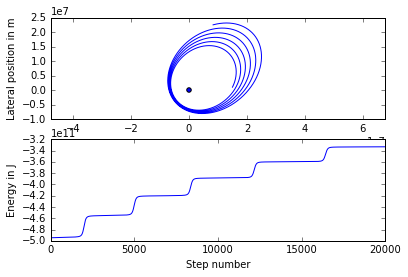

In [8]:
h = 5.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def total_energy():
    num_steps = 20000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    energy = numpy.zeros(num_steps + 1) # J = kg m2 / s2

    x[0, 0] = 15e6
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step] 
        v[step + 1] = v[step] + h * acceleration(x[step])

    ###Your code here.
    for step in range(num_steps + 1):
        energy[step] = 0.5 * spacecraft_mass * numpy.linalg.norm(v[step])**2 \
                     - gravitational_constant * earth_mass *spacecraft_mass / numpy.linalg.norm(x[step])

    return x, energy

x, energy = total_energy()


def plot_me():
    axes_positions = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes_positions.set_xlabel('Longitudinal position in m')
    axes_positions.set_ylabel('Lateral position in m')
    axes_energy = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(energy)
    axes_energy.set_xlabel('Step number')
    axes_energy.set_ylabel('Energy in J') # 1 Joule = 1 N m = 1 kg m2 / s2
    
plot_me()


## Symplectic Energy

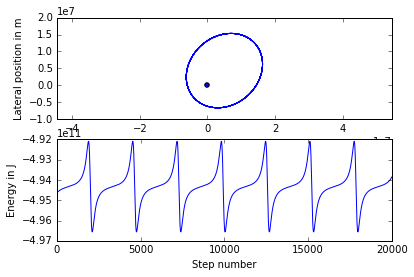

In [9]:
h = 5.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def symplectic_euler():
    num_steps = 20000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    energy = numpy.zeros(num_steps + 1) # J = kg m2 / s2

    x[0, 0] = 15e6
    x[0, 1] = 1e6    
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    ############ Modify the below code
    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step] 
        v[step + 1] = v[step] + h * acceleration(x[step + 1])
    ############ End code to modify

    for step in range(num_steps + 1):
        energy[step] = 0.5 * spacecraft_mass * numpy.linalg.norm(v[step])**2 \
                         - gravitational_constant * earth_mass * spacecraft_mass / numpy.linalg.norm(x[step])

    return x, energy

x, energy = symplectic_euler()


def plot_me():
    axes_positions = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes_positions.set_xlabel('Longitudinal position in m')
    axes_positions.set_ylabel('Lateral position in m')
    axes_energy = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(energy)
    axes_energy.set_xlabel('Step number')
    axes_energy.set_ylabel('Energy in J') # 1 Joule = 1 N m = 1 kg m2 / s2
    
plot_me()


## Boost The Rocket

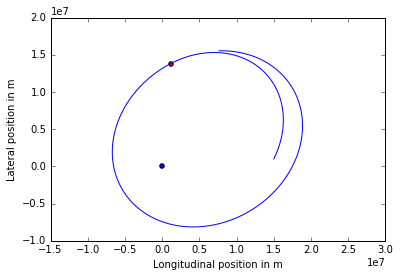

In [10]:
h = 3.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

# This is used to keep track of the data that we want to plot.
data = []

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def apply_boost():
    num_steps = 7000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = 15e6
    x[0, 1] = 1e6    
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    boost_done = False

    for step in range(num_steps):
        if h * step >= 2. * 3600. and  not boost_done:
            v[step] += 300. * v[step] / numpy.linalg.norm(v[step])
            boost_done = True###Input condition for firing the boost here:
            ###Your code here.

            data.append((x[step, 0], x[step, 1]))

        acceleration0 = acceleration(x[step])
        xE = x[step] + h * v[step]
        vE = v[step] + h * acceleration0
        x[step + 1] = x[step] + h * 0.5 * (v[step] + vE)
        v[step + 1] = v[step] + h * 0.5 * (acceleration0 + acceleration(xE))

    return x, v

x, v = apply_boost()


def plot_me():
    for (x_0, x_1) in data:
        matplotlib.pyplot.scatter(x_0, x_1, c = 'r')
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')

plot_me()

## Symplectic Euler

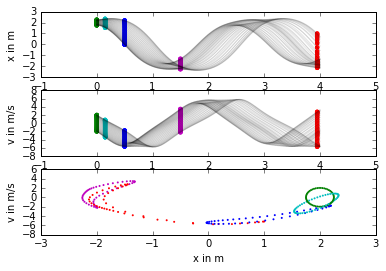

In [11]:
h = 0.05 # s
g = 9.81 # m / s2
length = 1. # m

def acceleration(position):
    return -g*math.sin(position/length)


def symplectic_euler_plot(): 
    axes_x = matplotlib.pyplot.subplot(311)
    axes_x.set_ylabel('x in m')
    axes_v = matplotlib.pyplot.subplot(312)
    axes_v.set_ylabel('v in m/s')
    axes_v.set_xlabel('t in s')
    axes_phase_space = matplotlib.pyplot.subplot(313)
    axes_phase_space.set_xlabel('x in m')
    axes_phase_space.set_ylabel('v in m/s')
    num_steps = 80
    x = numpy.zeros(num_steps + 1) # m around circumference
    v = numpy.zeros(num_steps + 1) # m / s
    colors = [(0, 'g'), (3, 'c'), (10, 'b'), (30, 'm'), (79, 'r')]
    times = h * numpy.arange(num_steps + 1)

    num_initial_conditions = 50

    for i in range(num_initial_conditions):
        # Your code here
        phi = 2.*math.pi*i/num_initial_conditions
        x[0] = 2.0 + 0.25*math.cos(phi)
        v[0] = 2.0*math.sin(phi)
        
        for step in range(num_steps):
            x[step+1] = x[step] + h*v[step]
            v[step+1] = v[step] + h*acceleration(x[step+1])
        # Don't worry about this part of the function. It's just for making 
        # the plot look a bit nicer.
        axes_x.plot(times, x, c = 'k', alpha = 0.1)
        axes_v.plot(times, v, c = 'k', alpha = 0.1)        
        for step, color in colors:
            matplotlib.pyplot.hold(True)
            axes_x.scatter(times[step], x[step], c = color, edgecolors = 'none')
            axes_v.scatter(times[step], v[step], c = color, edgecolors = 'none')        
            axes_phase_space.scatter(x[step], v[step], c = color, edgecolors = 'none', s = 4)
    matplotlib.pyplot.show()
    #return x, v

symplectic_euler_plot()

## Safe Return

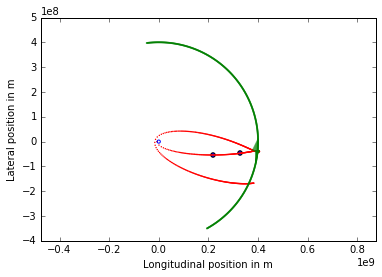

In [12]:
earth_mass = 5.97e24 # kg
earth_radius = 6.378e6 # m (at equator)
gravitational_constant = 6.67e-11 # m3 / kg s2
moon_mass = 7.35e22 # kg
moon_radius = 1.74e6 # m
moon_distance = 400.5e6 # m (actually, not at all a constant)
moon_period = 27.3 * 24.0 * 3600. # s
moon_initial_angle = math.pi / 180. * -61. # radian

total_duration = 12. * 24. * 3600. # s
marker_time = 0.5 * 3600. # s
tolerance = 100000. # m



def moon_position(time):
# Task 1: Compute the moon's position (a vector) at time t. Let it start at moon_initial_angle, not on the horizontal axis.   
    ###Your code here.
    moon_angle = moon_initial_angle + 2.*math.pi*time/moon_period
    position = numpy.zeros(2)
    position[0] = moon_distance * numpy.array(math.cos(moon_angle))
    position[1] = moon_distance * numpy.array(math.sin(moon_angle))
    return position

def acceleration(time, spaceship_position):
# Task 2: Compute the spacecraft's acceleration due to gravity
###Your code here.
    moon_pos = moon_position(time)
    vector_from_moon = spaceship_position - moon_pos
    vector_from_earth = spaceship_position
    acc = -gravitational_constant * (earth_mass / numpy.linalg.norm(vector_from_earth)**3 * vector_from_earth
                                     + moon_mass / numpy.linalg.norm(vector_from_moon)**3 * vector_from_moon)
    return acc  

# Task 5: (First see the other tasks below.) What is the appropriate boost to apply?
# Try -10 m/s, 0 m/s, 10 m/s, 50 m/s and 100 m/s and leave the correct amount in as you submit the solution.
boost = 10.

axes = matplotlib.pyplot.gca()
axes.set_xlabel('Longitudinal position in m')
axes.set_ylabel('Lateral position in m')

def apply_boost():

    # Do not worry about the arrays position_list, velocity_list, and times_list.  
    # They are simply used for plotting and evaluating your code, so none of the 
    # code that you add should involve them.
    
    boost = 0. # m/s Change this to the correct value from the list above after everything else is done.
    position_list = [numpy.array([-6.701e6, 0.])] # m
    velocity_list = [numpy.array([0., -10.818e3])] # m / s
    times_list = [0]
    position = position_list[0]
    velocity = velocity_list[0]
    current_time = 0.
    h = 0.1 # s, set as initial step size right now but will store current step size
    h_new = h # s, will store the adaptive step size of the next step
    mcc2_burn_done = False
    dps1_burn_done = False

    while current_time < total_duration:
        #Task 3: Include a retrograde rocket burn at 101104 seconds that reduces the velocity by 7.04 m/s
        # and include a rocket burn that increases the velocity at 212100 seconds by the amount given in the variable called boost.
        # Both velocity changes should happen in the direction of the rocket's motion at the time they occur.
        
        # Retrograde motion
        if not mcc2_burn_done and current_time >= 101104.:
            velocity -= 7.04 / numpy.linalg.norm(velocity) * velocity    # velocity is a vector
            matplotlib.pyplot.scatter(position[0], position[1])
            mcc2_burn_done = True
        
        # Prograde motion
        if not dps1_burn_done and current_time >= 212100.:
            velocity += boost / numpy.linalg.norm(velocity) * velocity
            matplotlib.pyplot.scatter(position[0], position[1])
            dps1_burn_done = True

        #Task 4: Implement Heun's method with adaptive step size. Note that the time is advanced at the end of this while loop.
        ###Your code here.
        acceleration0 = acceleration(current_time, position)
        velocityE = velocity + h*acceleration0      # Euler step
        positionE = position + h*velocity           # Euler step
        velocityH = velocity + h*0.5*(acceleration0 + acceleration(current_time+h, positionE))
        positionH = position + h*0.5*(velocity + velocityE)
        velocity = velocityH
        position = positionH

        ###Your code here.
        error = numpy.linalg.norm(positionE - positionH) + total_duration*numpy.linalg.norm(velocityE - velocityH)
        h_new = h*math.sqrt(tolerance/error)
        h_new = min(0.5 * marker_time, max(0.1, h_new)) # restrict step size to reasonable range
            
        current_time += h
        h = h_new
        position_list.append(position.copy())
        velocity_list.append(velocity.copy())
        times_list.append(current_time)

    return position_list, velocity_list, times_list, boost

position, velocity, current_time, boost = apply_boost()


def plot_path(position_list, times_list):
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
    previous_marker_number = -1;
    for position, current_time in zip(position_list, times_list):
         if current_time >= marker_time * previous_marker_number:
            previous_marker_number += 1
            matplotlib.pyplot.scatter(position[0], position[1], s = 2., facecolor = 'r', edgecolor = 'none')
            moon_pos = moon_position(current_time)
            if numpy.linalg.norm(position - moon_pos) < 30. * moon_radius: 
                axes.add_line(matplotlib.lines.Line2D([position[0], moon_pos[0]], [position[1], moon_pos[1]], alpha = 0.3, c = 'g')) 
    axes.add_patch(matplotlib.patches.CirclePolygon((0., 0.), earth_radius, facecolor = 'none', edgecolor = 'b'))
    for i in range(int(total_duration / marker_time)):
        moon_pos = moon_position(i * marker_time)
        axes.add_patch(matplotlib.patches.CirclePolygon(moon_pos, moon_radius, facecolor = 'none', edgecolor = 'g', alpha = 0.7))

    matplotlib.pyplot.axis('equal')
    matplotlib.pyplot.show()

plot_path(position, current_time)